In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from tqdm import tqdm

In [2]:
# Upload the required files
from google.colab import files
files.upload()

Saving X_train.txt to X_train.txt
Saving y_train.txt to y_train.txt


In [116]:
# Load the training set with a regular expression delimiter
X_train_raw = pd.read_csv('/content/X_train.txt', delimiter=r'\s+', header=None, engine='python')
y_train_raw = pd.read_csv('/content/y_train.txt', header=None, names=['activity'])

In [117]:
X_test_raw = pd.read_csv('/content/X_test.txt', delimiter=r'\s+', header=None, engine='python')
y_test_raw = pd.read_csv('/content/y_test.txt', header=None, names=['activity'])

In [118]:
# Check for missing values
print("Missing values in X_train:", X_train_raw.isnull().sum().sum())
print("Missing values in y_train:", y_train_raw.isnull().sum().sum())

print("Missing values in X_test:", X_test_raw.isnull().sum().sum())
print("Missing values in y_test:", y_test_raw.isnull().sum().sum())

Missing values in X_train: 0
Missing values in y_train: 0
Missing values in X_test: 0
Missing values in y_test: 0


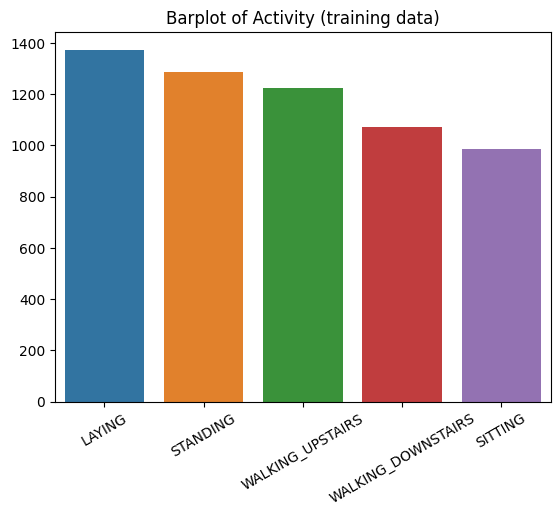

In [119]:
activity_labels = {0: 'WALKING', 1: 'WALKING_UPSTAIRS', 2: 'WALKING_DOWNSTAIRS', 3: 'SITTING', 4: 'STANDING', 5: 'LAYING'}
y_train_plot = y_train_raw.copy()
y_train_plot = y_train_plot['activity'].map(activity_labels)

plt.title("Barplot of Activity (training data)")
sns.barplot(y = y_train_plot.value_counts().values , x = y_train_plot.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

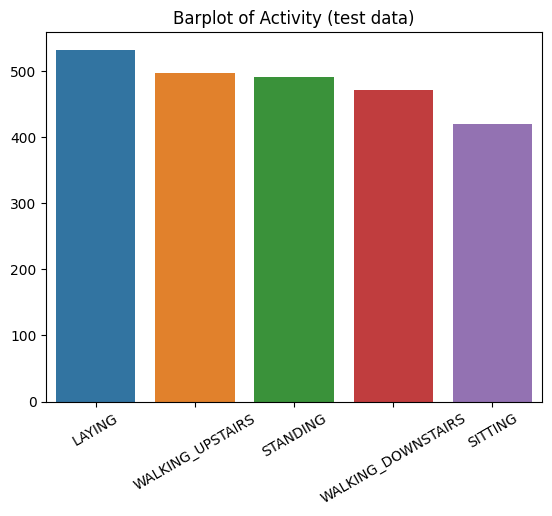

In [120]:
activity_labels = {0: 'WALKING', 1: 'WALKING_UPSTAIRS', 2: 'WALKING_DOWNSTAIRS', 3: 'SITTING', 4: 'STANDING', 5: 'LAYING'}
y_test_plot = y_test_raw.copy()
y_test_plot = y_test_plot['activity'].map(activity_labels)

plt.title("Barplot of Activity (test data)")
sns.barplot(y = y_test_plot.value_counts().values , x = y_test_plot.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

In [121]:
# Encode activity labels
label_encoder = LabelEncoder()
y_train_raw = pd.DataFrame(label_encoder.fit_transform(y_train_raw['activity']))
y_test_raw = pd.DataFrame(label_encoder.fit_transform(y_test_raw['activity']))

In [122]:
# Display the first few rows of the loaded data
print("X_train shape:", X_train_raw.shape)
print("y_train shape:", y_train_raw.shape)

print("X_test shape:", X_test_raw.shape)
print("y_test shape:", y_test_raw.shape)

X_train shape: (7352, 561)
y_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)


In [123]:
# Basic statistics and information about the dataset
print(X_train_raw.describe())
print(X_train_raw.info())

               0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604  ...   
std       0.418687     0.424073     0.485942     0.414122     0.544547  ...   
min      -1.00000

In [124]:
print(X_test_raw.describe())
print(X_test_raw.info())

               0            1            2            3            4    \
count  2947.000000  2947.000000  2947.000000  2947.000000  2947.000000   
mean      0.273996    -0.017863    -0.108386    -0.613635    -0.508330   
std       0.060570     0.025745     0.042747     0.412597     0.494269   
min      -0.592004    -0.362884    -0.576184    -0.999606    -1.000000   
25%       0.262075    -0.024961    -0.121162    -0.990914    -0.973664   
50%       0.277113    -0.016967    -0.108458    -0.931214    -0.790972   
75%       0.288097    -0.010143    -0.097123    -0.267395    -0.105919   
max       0.671887     0.246106     0.494114     0.465299     1.000000   

               5            6            7            8            9    ...  \
count  2947.000000  2947.000000  2947.000000  2947.000000  2947.000000  ...   
mean     -0.633797    -0.641278    -0.522676    -0.637038    -0.462063  ...   
std       0.362699     0.385199     0.479899     0.357753     0.523916  ...   
min      -0.99895

In [125]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_raw))

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_raw))

In [126]:
# Display the shapes of the preprocessed data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_test_scaled.shape)

print("y_train shape:", y_train_raw.shape)
print("y_val shape:", y_test_raw.shape)

X_train_scaled shape: (7352, 561)
X_val_scaled shape: (2947, 561)
y_train shape: (7352, 1)
y_val shape: (2947, 1)


## PCA

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # for example, to keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**MODELS**

## Gaussian Naive Bayes

In [128]:
class GaussianNaiveBayes:

    def __init__(self, data, target) -> None:
        self.data = data
        # Ensure target is a 1D array for correct boolean indexing
        # Convert target to numpy array if it's a DataFrame
        if isinstance(target, pd.DataFrame) or isinstance(target, pd.Series):
            self.target = target.values.flatten()
        else:
            self.target = target.flatten() if len(target.shape) > 1 else target

    def gaussian(self, X, mean, std):
        # Calculate the Gaussian probability of X given the mean and standard deviation.
        exponent = np.exp(-(X - mean)**2 / (2 * std**2))
        return exponent / (np.sqrt(2 * np.pi) * std)

    def gaussian_fit(self, X):
        # Compute the mean and standard deviation for the Gaussian Naive Bayes model.
        return X.mean(axis=0), X.std(axis=0)

    def fit(self):
        unique_classes, counts = np.unique(self.target, return_counts=True)
        self.classes = {label: idx for idx, label in enumerate(unique_classes)}
        self.prior = counts / counts.sum()
        self.pdf_data = {label: self.gaussian_fit(self.data[self.target == label]) for label in unique_classes}

    def predict(self, X):
        y_pred = []
        for x_data in X:
            scores = {}
            for label, idx in self.classes.items():
                mean_list, std_list = self.pdf_data[label]
                likelihood = np.prod(self.gaussian(x_data, mean_list, std_list))
                posterior = likelihood * self.prior[idx]
                scores[label] = posterior
            y_pred.append(max(scores, key=scores.get))
        return np.array(y_pred)

    def compute_metrics(self, y_true, y_pred):
    # Convert y_true and y_pred to numpy arrays if they are Pandas DataFrame/Series
        if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
            y_true = y_true.values
        if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
            y_pred = y_pred.values

    # Ensure both y_true and y_pred are 1D arrays
        y_true = y_true.flatten()
        y_pred = y_pred.flatten()

    # Initialize and populate the confusion matrix
        unique_labels = np.unique(np.concatenate([y_true, y_pred]))
        conf_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
        label_to_index = {label: index for index, label in enumerate(unique_labels)}

        for true, pred in zip(y_true, y_pred):
            true_index = label_to_index[true]
            pred_index = label_to_index[pred]
            conf_matrix[true_index, pred_index] += 1

        # Calculate overall metrics
        metrics = self.calculate_overall_metrics(conf_matrix, unique_labels)
        return metrics

    def calculate_overall_metrics(self, conf_matrix, unique_labels):
        # Initialize sums for macro-averaged metrics
        sum_precision = 0
        sum_recall = 0
        sum_f1 = 0

        for i in range(len(unique_labels)):
            TP = conf_matrix[i, i]
            FP = conf_matrix[:, i].sum() - TP
            FN = conf_matrix[i, :].sum() - TP

            Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
            Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
            F1_score = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0

            sum_precision += Precision
            sum_recall += Recall
            sum_f1 += F1_score

        # Calculate macro-averaged metrics
        macro_precision = sum_precision / len(unique_labels)
        macro_recall = sum_recall / len(unique_labels)
        macro_f1 = sum_f1 / len(unique_labels)

        # Calculate accuracy
        accuracy = np.diag(conf_matrix).sum() / conf_matrix.sum()

        return {
            "Accuracy": accuracy,
            "Macro Precision": macro_precision,
            "Macro Recall": macro_recall,
            "Macro F1 Score": macro_f1
        }


In [129]:
model_gnb = GaussianNaiveBayes(X_train_pca, y_train_raw)
model_gnb.fit()

In [130]:
predictions = model_gnb.predict(X_test_pca)

In [131]:
# Evaluate
gnb_metrics = model_gnb.compute_metrics(y_test_raw, predictions)

# Print overall metrics
for metric, value in gnb_metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8018
Macro Precision: 0.8089
Macro Recall: 0.7960
Macro F1 Score: 0.7974


In [132]:
import numpy as np
from tqdm import tqdm

class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, tolerance=1e-4, max_iteration=1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iteration = max_iteration

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, X, y_encoded, probabilities):
        m = X.shape[0]
        loss = - (1 / m) * np.sum(y_encoded * np.log(probabilities))
        return loss

    def fit(self, X, y):
        # One-hot encoding of y
        self.classes = np.unique(y)
        y_encoded = self.one_hot_encode(y)

        # Initialize weights
        self.w = np.zeros((X.shape[1], len(self.classes)))

        # Gradient descent
        for _ in tqdm(range(self.max_iteration)):
            # Compute softmax probabilities
            probabilities = self.softmax(X.dot(self.w))

            # Compute gradient
            grad = X.T.dot(probabilities - y_encoded) / X.shape[0]

            # Update weights
            self.w -= self.learning_rate * grad

            # Check for convergence
            if np.linalg.norm(grad) < self.tolerance:
                break

    def predict(self, X):
        probabilities = self.softmax(X.dot(self.w))
        return np.array([self.classes[i] for i in np.argmax(probabilities, axis=1)])

    def one_hot_encode(self, y):
    # Convert y to a numpy array if it's a Pandas DataFrame/Series
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.values

        y = y.ravel()  # Flatten the array to make it 1D
        y_encoded = np.zeros((y.size, len(self.classes)))
        for i, class_ in enumerate(self.classes):
            y_encoded[:, i] = (y == class_)
        return y_encoded

    def predict(self, X):
        probabilities = self.softmax(X.dot(self.w))
        return np.array([self.classes[i] for i in np.argmax(probabilities, axis=1)])

    def compute_metrics(self, y_true, y_pred):
        if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
            y_true = y_true.values
        if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
            y_pred = y_pred.values

        y_true = y_true.flatten()
        y_pred = y_pred.flatten()

        unique_labels = np.unique(np.concatenate([y_true, y_pred]))
        conf_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
        label_to_index = {label: index for index, label in enumerate(unique_labels)}

        for true, pred in zip(y_true, y_pred):
            true_index = label_to_index[true]
            pred_index = label_to_index[pred]
            conf_matrix[true_index, pred_index] += 1

        return self.calculate_overall_metrics(conf_matrix, unique_labels)

    def calculate_overall_metrics(self, conf_matrix, unique_labels):
        sum_precision = 0
        sum_recall = 0
        sum_f1 = 0

        for i in range(len(unique_labels)):
            TP = conf_matrix[i, i]
            FP = conf_matrix[:, i].sum() - TP
            FN = conf_matrix[i, :].sum() - TP

            Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
            Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
            F1_score = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0

            sum_precision += Precision
            sum_recall += Recall
            sum_f1 += F1_score

        macro_precision = sum_precision / len(unique_labels)
        macro_recall = sum_recall / len(unique_labels)
        macro_f1 = sum_f1 / len(unique_labels)
        accuracy = np.diag(conf_matrix).sum() / conf_matrix.sum()

        return {
            "Accuracy": accuracy,
            "Macro Precision": macro_precision,
            "Macro Recall": macro_recall,
            "Macro F1 Score": macro_f1
        }

In [133]:
smr_model = SoftmaxRegression(learning_rate=0.01, tolerance=1e-4, max_iteration=1000)
smr_model.fit(X_train_pca, y_train_raw)

100%|██████████| 1000/1000 [00:08<00:00, 114.95it/s]


In [136]:
y_pred_smr = smr_model.predict(X_test_pca)
metrics_smr = smr_model.compute_metrics(y_test_raw, y_pred_smr)
print(metrics_smr)


{'Accuracy': 0.9426535459789617, 'Macro Precision': 0.9424782590110062, 'Macro Recall': 0.942143792737112, 'Macro F1 Score': 0.9422141985901069}


## NN

In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

# Correctly determine the number of unique classes
num_classes = len(np.unique(y_train_raw))

# Ensure class labels start from 0 (zero-indexing)
# Adjust this as necessary based on your label format
y_train_raw_zero_indexed = y_train_raw - y_train_raw.min()
y_val_raw_zero_indexed = y_test_raw - y_test_raw.min()

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train_raw_zero_indexed, num_classes)
y_val_encoded = to_categorical(y_val_raw_zero_indexed, num_classes)
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train_pca.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Adjusted for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy',  # Adjusted for multi-class
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_pca, y_train_encoded, epochs=10, batch_size=32)

# Evaluate the model on test data
y_pred = model.predict(X_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Print classification report and confusion matrix
print(classification_report(y_test_raw, y_pred_classes))
print(confusion_matrix(y_test_raw, y_pred_classes))


Epoch 1/10
230/230 [==============================] - 2s 3ms/step - loss: 1.6542 - accuracy: 0.4185
Epoch 2/10
230/230 [==============================] - 1s 4ms/step - loss: 0.8712 - accuracy: 0.6298
Epoch 3/10
230/230 [==============================] - 1s 3ms/step - loss: 0.6258 - accuracy: 0.7251
Epoch 4/10
230/230 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 0.7965
Epoch 5/10
230/230 [==============================] - 1s 2ms/step - loss: 0.4070 - accuracy: 0.8301
Epoch 6/10
230/230 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8625
Epoch 7/10
230/230 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.8878
Epoch 8/10
230/230 [==============================] - 1s 2ms/step - loss: 0.2497 - accuracy: 0.9007
Epoch 9/10
230/230 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9162
Epoch 10/10
93/93 [==============================] - 0s 2ms/step
              precision    recall  